In [2]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [3]:
NET = "2way_single_intersection"

In [4]:
baseline_df = pd.read_csv(os.path.join("no_rl", NET, "collated_results.csv"))
ppo_df = pd.read_csv(os.path.join(NET, "collated_results.csv"))

  Mean: 89383.59747123995
    SD: 370.26406089684593
Median: 89327.2732605873


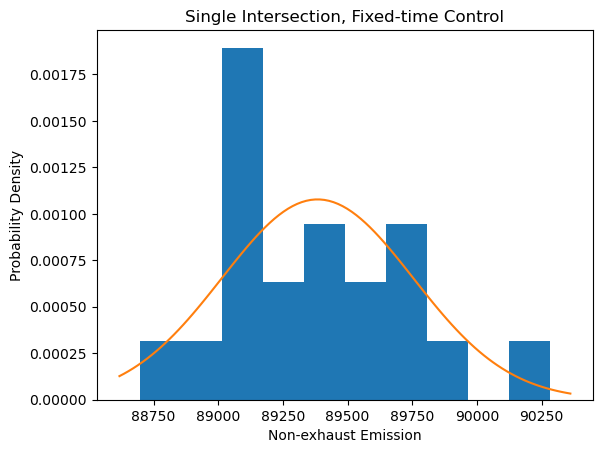

In [5]:
baseline_data = baseline_df["total_tyre_pm"]

mean_baseline, std_baseline = norm.fit(baseline_data)
med_baseline = np.median(baseline_data)
print("  Mean:", mean_baseline)
print("    SD:", std_baseline)
print("Median:", med_baseline)

plt.hist(baseline_data, density=True)

xmin, xmax = plt.xlim()
x_baseline = np.linspace(xmin, xmax, 100)
p_baseline = norm.pdf(x_baseline, mean_baseline, std_baseline)

plt.plot(x_baseline, p_baseline)

plt.xlabel("Non-exhaust Emission")
plt.ylabel("Probability Density")
plt.title("Single Intersection, Fixed-time Control")

plt.show()

  Mean: 48591.21078600404
    SD: 2911.0774529398072
Median: 47759.975159070935


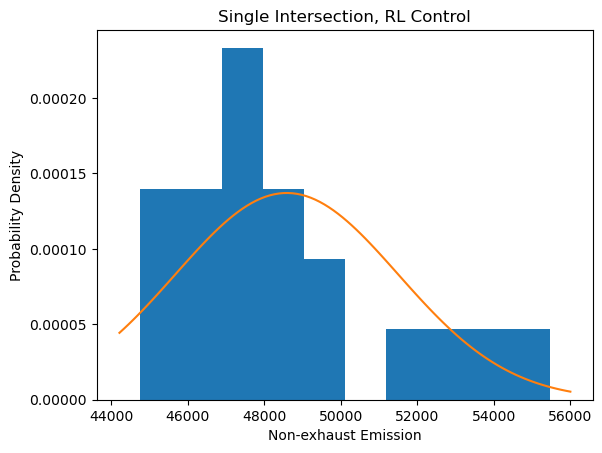

In [6]:
ppo_data = ppo_df["total_tyre_pm"]

mean_ppo, std_ppo = norm.fit(ppo_data)
med_ppo = np.median(ppo_data)
print("  Mean:", mean_ppo)
print("    SD:", std_ppo)
print("Median:", med_ppo)

plt.hist(ppo_data, density=True)

xmin, xmax = plt.xlim()
x_ppo = np.linspace(xmin, xmax, 100)
p_ppo = norm.pdf(x_ppo, mean_ppo, std_ppo)

plt.plot(x_ppo, p_ppo)

plt.xlabel("Non-exhaust Emission")
plt.ylabel("Probability Density")
plt.title("Single Intersection, RL Control")

plt.show()

In [7]:
CONF_LVL = 99  # percent

print(
f"The null hypothesis is that the distribution of NEE under RL control is the same as the distribution of \
NEE under fixed-time control. It was decided that a confidence level of {CONF_LVL}% is required to reject \
the null hypothesis in favour of the alternative: that under RL control, less NEE would be emitted.\n")

print(
f"Descriptive analysis shows that the mean NEE under RL control ({mean_ppo:.2f}, SD={std_ppo:.2f}) is significantly lower than\
the mean NEE under the baseline fixed-time control ({mean_baseline:.2f}, SD={std_baseline:.2f}). It is also noted that the median \
for the RL-controlled simulations ({med_ppo:.2f}) is lower than the median for the baseline simulations ({med_baseline:.2f}).")

The null hypothesis is that the distribution of NEE under RL control is the same as the distribution of NEE under fixed-time control. It was decided that a confidence level of 99% is required to reject the null hypothesis in favour of the alternative: that under RL control, less NEE would be emitted.

Descriptive analysis shows that the mean NEE under RL control (48591.21, SD=2911.08) is significantly lower thanthe mean NEE under the baseline fixed-time control (89383.60, SD=370.26). It is also noted that the median for the RL-controlled simulations (47759.98) is lower than the median for the baseline simulations (89327.27).


In [10]:
from scipy.stats import mannwhitneyu

_, p = mannwhitneyu(ppo_data, baseline_data, alternative="less")
if p < 0.001:
    p_report = "significant (p<0.001)"
else:
    p_report = f"not significant (p={p:.3f})"

print(
f"As the data is not normally distributed, non-parametric statistics has been\
used. Mann-Whitney U test analysis shows that this difference is {p_report}.")

As the data is not normally distributed, non-parametric statistics has beenused. Mann-Whitney U test analysis shows that this difference is significant (p<0.001).


In [9]:
p

3.397807564086679e-08